## **Cavity Flow with Navier Stokes**

To solve fluid flow problems we use the Navier Stokes momentum equations:

$$  \frac{\partial{\textbf{v}}}{\partial{t}} + (\textbf{v}\cdot\nabla)\textbf{v}) = -\frac{1}{\rho}\nabla{p} + \textbf{v}\nabla^{2}{\textbf{v}}  $$

These are used in conjunction with continuity as seen in the Poisson equation.

This gives us the following system of equations:

$$
\begin{aligned}
    \frac{\partial{u}}{\partial{t}} + u\frac{\partial{u}}{\partial{x}} + v\frac{\partial{u}}{\partial{y}} = -\frac{1}{\rho}\frac{\partial{p}}{\partial{x}} + \nu\left( \frac{\partial^{2}{u}}{\partial{x^{2}}} + \frac{\partial^{2}{u}}{\partial{y^{2}}} \right)\\
    \frac{\partial{v}}{\partial{t}} + u\frac{\partial{v}}{\partial{x}} + v\frac{\partial{v}}{\partial{y}} = -\frac{1}{\rho}\frac{\partial{p}}{\partial{y}} + \nu\left( \frac{\partial^{2}{v}}{\partial{x^{2}}} + \frac{\partial^{2}{v}}{\partial{y^{2}}} \right)\\
    \frac{\partial^{2}{p}}{\partial{x^{2}}} + \frac{\partial^{2}{p}}{\partial{y^{2}}} = -\rho\left(\frac{\partial{u}}{\partial{x}}\frac{\partial{u}}{\partial{x}} + 2\frac{\partial{u}}{\partial{y}}\frac{\partial{v}}{\partial{x}} + \frac{\partial{v}}{\partial{y}}\frac{\partial{v}}{\partial{y}}\right)\\
\end{aligned}
$$

These can be discretised as follows:

$$
\begin{aligned}
    \frac{u_{i, j}^{n + 1} - u_{i, j}^{n}}{\Delta{t}} + u_{i,j}^{n}\frac{u_{i, j}^{n} - u_{i - 1, j}^{n}}{\Delta{x}} + v_{i,j}^{n}\frac{u_{i, j}^{n} - u_{i, j - 1}^{n}}{\Delta{y}} &= -\frac{1}{\rho}\frac{p_{i,j + 1}^{n} - p_{i,j - 1}^{n}}{2\Delta{x}} + \nu\left( \frac{u_{i + 1,j}^{n} - 2u_{i,j}^{n} + u_{i - 1,j}^{n}}{\Delta{x^{2}}} + \frac{u_{i,j + 1}^{n} - 2u_{i,j}^{n} + u_{i,j - 1}^{n}}{\Delta{y^{2}}} \right)\\
    \frac{v_{i, j}^{n + 1} - v_{i, j}^{n}}{\Delta{t}} + u_{i,j}^{n}\frac{v_{i, j}^{n} - v_{i - 1, j}^{n}}{\Delta{x}} + v_{i,j}^{n}\frac{v_{i, j}^{n} - v_{i, j - 1}^{n}}{\Delta{y}} &= -\frac{1}{\rho}\frac{p_{i,j + 1}^{n} - p_{i,j - 1}^{n}}{2\Delta{y}} + \nu\left( \frac{v_{i + 1,j}^{n} - 2v_{i,j}^{n} + v_{i - 1,j}^{n}}{\Delta{x^{2}}} + \frac{v_{i,j + 1}^{n} - 2v_{i,j}^{n} + v_{i,j - 1}^{n}}{\Delta{y^{2}}} \right)\\
    \frac{p_{i + 1,j}^{n} - 2p_{i,j}^{n} + p_{i - 1,j}^{n}}{\Delta{x^{2}}} + \frac{p_{i,j + 1}^{n} - 2p_{i,j}^{n} + p_{i, j - 1}^{n}}{\Delta{y^{2}}} &= \rho\left[ \frac{1}{\Delta{t}}\left( \frac{u_{i + 1,j}^{n} - u_{i - 1,j}^{n}}{2\Delta{x}} + \frac{v_{i,j + 1}^{n} - v_{i,j - 1}^{n}}{2\Delta{y}} \right) - \frac{u_{i + 1,j}^{n} - u_{i - 1,j}^{n}}{2\Delta{x}}\frac{u_{i + 1,j}^{n} - u_{i - 1,j}^{n}}{2\Delta{x}} - 2\frac{u_{i,j + 1}^{n} - u_{i,j - 1}^{n}}{2\Delta{y}}\frac{v_{i + 1,j}^{n} - v_{i - 1,j}^{n}}{2\Delta{x}} - \frac{v_{i,j + 1}^{n} - v_{i,j - 1}^{n}}{2\Delta{y}}\frac{v_{i,j + 1}^{n} - v_{i,j - 1}^{n}}{2\Delta{y}} \right]
\end{aligned}
$$

And solved as follows:

$$
\begin{aligned}
    u_{i,j}^{n + 1} &= u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta{t}}{\Delta{x}}(u_{i,j}^{n} - u_{i - 1,j}^{n}) - v_{i,j}^{n}\frac{\Delta{t}}{\Delta{y}}(u_{i,j}^{n} - u_{i, j - 1}^{n}) - \frac{\Delta{t}}{2\rho\Delta{x}}(p_{i + 1,j}^{n} - p_{i - 1,j}^{n}) + \nu\left( \frac{\Delta{t}}{\Delta{x^{2}}}(u_{i + 1,j}^{n} -2u_{i,j}^{n} + u_{i - 1,j}^{n}) + \frac{\Delta{t}}{\Delta{y^{2}}}(u_{i,j + 1}^{n} -2u_{i,j}^{n} + u_{i,j - 1}^{n}) \right)\\
    v_{i,j}^{n + 1} &= v_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta{t}}{\Delta{x}}(v_{i,j}^{n} - v_{i - 1,j}^{n}) - v_{i,j}^{n}\frac{\Delta{t}}{\Delta{y}}(v_{i,j}^{n} - v_{i, j - 1}^{n}) - \frac{\Delta{t}}{2\rho\Delta{y}}(p_{i,j + 1}^{n} - p_{i,j - 1}^{n}) + \nu\left( \frac{\Delta{t}}{\Delta{x^{2}}}(v_{i + 1,j}^{n} -2v_{i,j}^{n} + v_{i - 1,j}^{n}) + \frac{\Delta{t}}{\Delta{y^{2}}}(v_{i,j + 1}^{n} -2v_{i,j}^{n} + v_{i,j - 1}^{n}) \right)\\
    p_{i,j}^{n} &= \frac{\Delta{y^{2}}(p_{i + 1,j}^{n} + p_{i - 1,j}^{n}) + \Delta{x^{2}}(p_{i,j + 1}^{n} + p_{i,j - 1}^{n})}{2(\Delta{x^{2}} + \Delta{y^{2}})} - \frac{\rho\Delta{x^{2}}\Delta{y^{2}}}{2(\Delta{x^{2}} + \Delta{y^{2}})} \left[ \frac{1}{\Delta{t}}\left( \frac{u_{i + 1,j}^{n} - u_{i - 1,j}^{n}}{2\Delta{x}} + \frac{v_{i,j + 1}^{n} - v_{i,j - 1}^{n}}{2\Delta{y}} \right) - \frac{u_{i + 1,j}^{n} - u_{i - 1,j}^{n}}{2\Delta{x}}\frac{u_{i + 1,j}^{n} - u_{i - 1,j}^{n}}{2\Delta{x}} - 2\frac{u_{i,j + 1}^{n} - u_{i,j - 1}^{n}}{2\Delta{y}}\frac{v_{i + 1,j}^{n} - v_{i - 1,j}^{n}}{2\Delta{x}} - \frac{v_{i,j + 1}^{n} - v_{i,j - 1}^{n}}{2\Delta{y}}\frac{v_{i,j + 1}^{n} - v_{i,j - 1}^{n}}{2\Delta{y}} \right]\\
\end{aligned}
$$

#### **Initial Conditions:**

$$  u = v = p = 2 \quad\forall{x_{i} \in{X^{2}}}  $$

#### **Boundary Conditions:**

$$
\begin{aligned}
    u(y = 2) &= 1\\
    u,v &= 0 \quad\text{on all other boundaries}\\
    \frac{\partial{p}}{\partial{y}}(y = 0) &= 0\\
    p(y = 2) &= 0\\
    \frac{\partial{p}}{\partial{x}}(x = 0, 2) &= 0\\
\end{aligned}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = 0.001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

In [10]:
def pressure_poisson(p, dx, dy, b, rho, dt, u, v):
    pn = np.empty_like(p)
    pn = p.copy()
    b = np.zeros((ny, nx))
    
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) - 
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx)) ** 2 - 
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) * (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx)) - 
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) ** 2))
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = ((((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy ** 2 + (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx ** 2) / (2 * (dx ** 2 + dy ** 2))) -
                          dx ** 2 * dy ** 2 / (2 * (dx ** 2 + dy ** 2)) * b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 @ x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 @ y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 @ x = 0
        p[-1, :] = 0        # p = 0     @ y = 2
        
    return p

In [47]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        p = pressure_poisson(p, dx, dy, b, rho, dt, u, v)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

In [48]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 500
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

(0.0, 2.0)

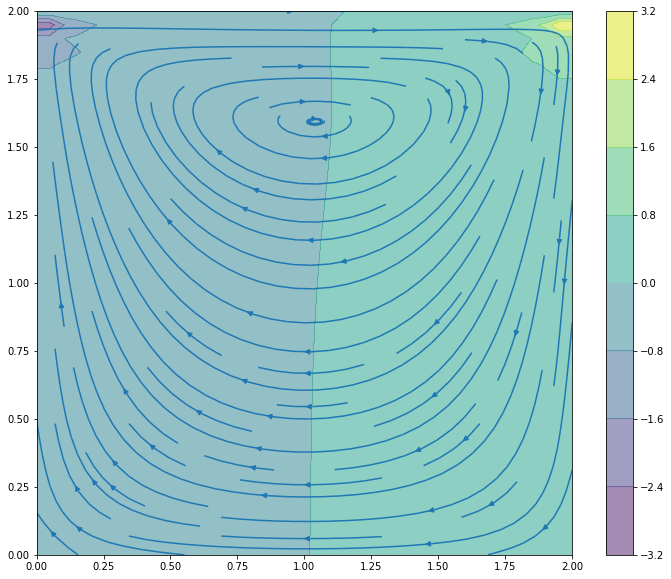

In [49]:
fig = plt.figure(figsize=(12, 10))
plt.contourf(X, Y, p, alpha=0.5, cmap='viridis')
plt.colorbar()

plt.streamplot(X, Y, u, v)
plt.xlim(0, 2)
plt.ylim(0, 2)